## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
#Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units//2, activation="relu")(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units//2, activation="relu")(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXPS = [0.25, 0.3, 0.35]

In [7]:
results = {}
"""Code Here
撰寫訓練流程並將結果用dictionary紀錄
"""
for Dropout_EXP in Dropout_EXPS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "1 layer %f" %(Dropout_EXP)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

196/196 [==============================] - 4s 18ms/step - loss: 1.5331 - accuracy: 0.4457 - val_loss: 1.4585 - val_accuracy: 0.4784
Epoch 43/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5256 - accuracy: 0.4516 - val_loss: 1.4538 - val_accuracy: 0.4812
Epoch 44/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5156 - accuracy: 0.4537 - val_loss: 1.4529 - val_accuracy: 0.4781
Epoch 45/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5146 - accuracy: 0.4564 - val_loss: 1.4513 - val_accuracy: 0.4817
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5101 - accuracy: 0.4562 - val_loss: 1.4467 - val_accuracy: 0.4809
Epoch 47/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5040 - accuracy: 0.4607 - val_loss: 1.4590 - val_accuracy: 0.4788
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.4935 - accuracy: 0.4626 - val_loss: 1.4389 - val_accuracy: 0.4864
Epoc

Epoch 34/50
196/196 [==============================] - 3s 18ms/step - loss: 1.6725 - accuracy: 0.3828 - val_loss: 1.5677 - val_accuracy: 0.4303
Epoch 35/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6679 - accuracy: 0.3872 - val_loss: 1.5764 - val_accuracy: 0.4299
Epoch 36/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6630 - accuracy: 0.3901 - val_loss: 1.5747 - val_accuracy: 0.4262
Epoch 37/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6518 - accuracy: 0.3926 - val_loss: 1.5550 - val_accuracy: 0.4325
Epoch 38/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6469 - accuracy: 0.3976 - val_loss: 1.5404 - val_accuracy: 0.4444
Epoch 39/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6423 - accuracy: 0.3993 - val_loss: 1.5361 - val_accuracy: 0.4461
Epoch 40/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6308 - accuracy: 0.4034 - val_loss: 1.5498 - val_accuracy:

196/196 [==============================] - 3s 18ms/step - loss: 1.8326 - accuracy: 0.2904 - val_loss: 1.7428 - val_accuracy: 0.3221
Epoch 26/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8322 - accuracy: 0.2940 - val_loss: 1.7369 - val_accuracy: 0.3304
Epoch 27/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8252 - accuracy: 0.2954 - val_loss: 1.7252 - val_accuracy: 0.3317
Epoch 28/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8179 - accuracy: 0.3000 - val_loss: 1.7158 - val_accuracy: 0.3370
Epoch 29/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8089 - accuracy: 0.3035 - val_loss: 1.7314 - val_accuracy: 0.3285
Epoch 30/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8042 - accuracy: 0.3048 - val_loss: 1.7159 - val_accuracy: 0.3432
Epoch 31/50
196/196 [==============================] - 4s 18ms/step - loss: 1.7991 - accuracy: 0.3109 - val_loss: 1.7007 - val_accuracy: 0.3447
Epoc

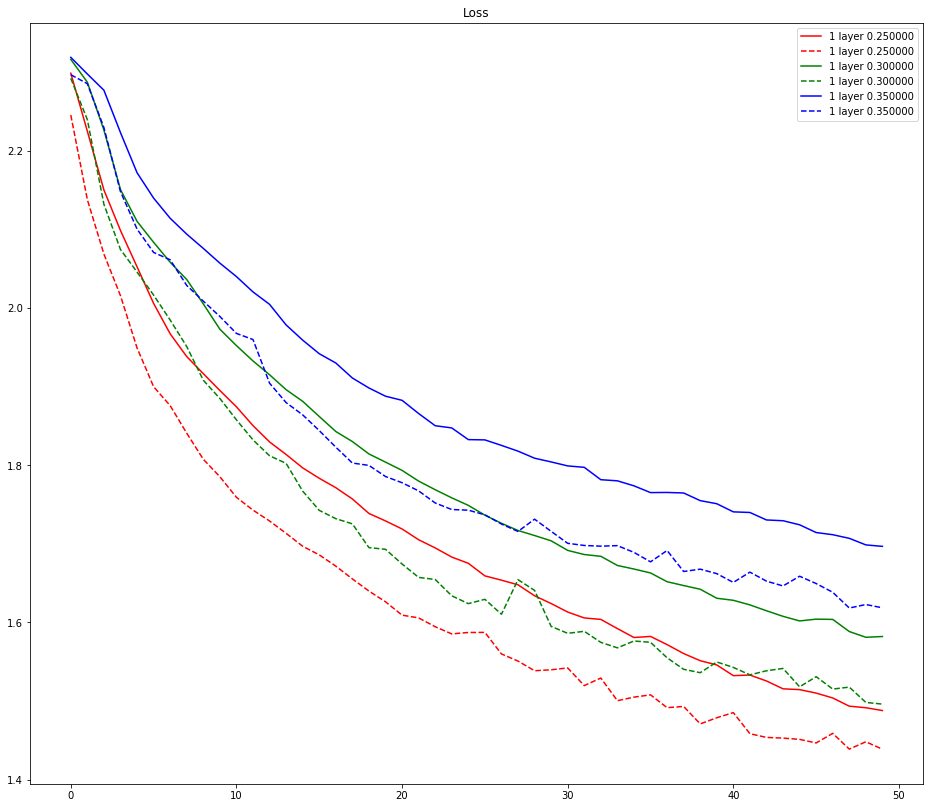

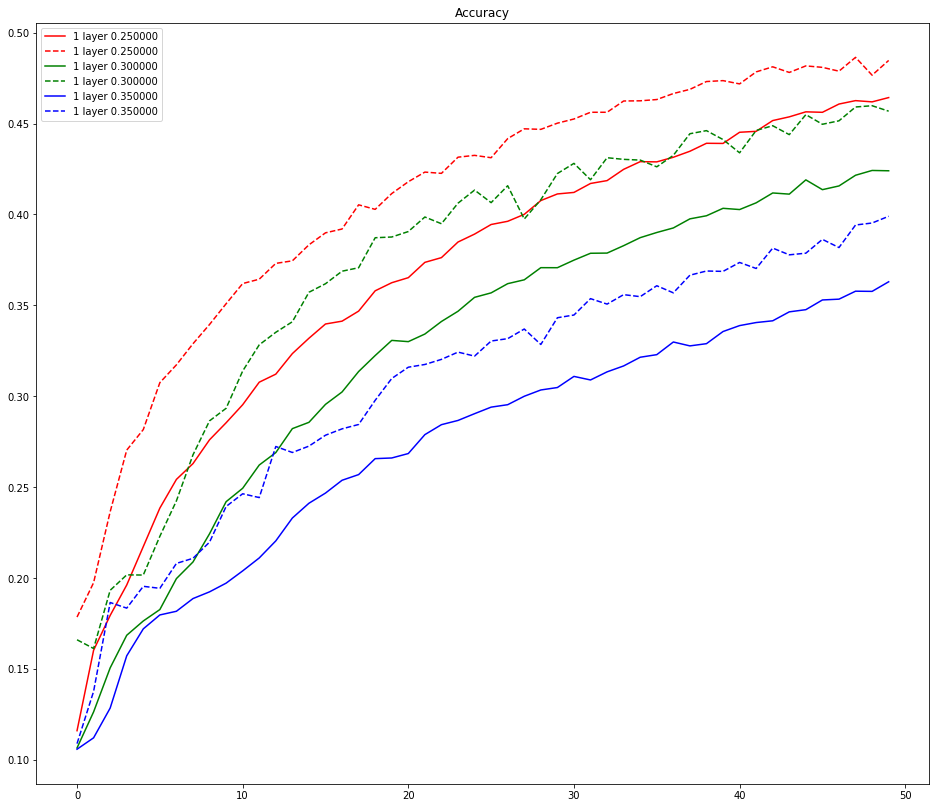

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()